### 5.1 주성분 분석(PCA)을 통한 비지도 차원 축소

#### 5.1.1 주성분 분석의 주요 단계
주성분 분석 : 특성 사이의 상관관계를 기반으로 데이터에 있는 패턴을 찾음   
-> 고차원 데이터에서 분산이 가장 큰 방향을 찾고 좀 더 작거나 같은 수의 차원을 찾는 새로운 부분 공간으로 이를 투영   
=> 새로운 부분 공간의 직교 좌표(주성분)는 주어진 조건하에서 분산이 최대인 방향

1. $d$ 차원 데이터셋을 표준화 전처리
2. 공분산 행렬을 만듦
3. 공분산 행렬을 고유 벡터와 고윳값으로 분해
4. 고윳값을 내림차순으로 정렬하고 그에 해당하는 고유 벡터의 순위를 매김
5. 고윳값이 가장 큰 $k$개의 고유 벡터를 선택, 여기에서 k는 새로운 특성 부분 공간의 차원($k ≤ d$)
6. 최상위 $k$개의 고유 벡터로 투영 행렬 $W$를 만듦
7. 투영 행렬 $W$를 사용해서 $d$차원 입력 데이터셋 $X$를 새로운 $k$차원의 특성 부분 공간으로 변환

#### 5.1.2 주성분 추출 단계

**1. 데이터를 표준화 전처리**

In [1]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
from sklearn.model_selection import train_test_split

# x, y 분리
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:,0].values

# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# 특성을 표준화 전처리
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

**2. 공분산 행렬 만들기**
공분산 행렬 : $d * d$ 차원의 대칭 행렬, 특성 상호 간의 공분산 저장   
$d$ : 데이터셋에 있는 차원 개수   
   
ex) 전체 샘플에 대한 두 특성 $x_j$와 $x_k$ 사이의 공분산은 다음 식으로 계산 가능   
$\begin{align} \notag σ_{jk}=\frac{1}{n-1}\sum_{i=1}^n (x^{i}_j - μ_j)(x^{i}_k - μ_k) \end{align}$
- $μ_j, μ_k$ : 특성 $j, k$의 샘플 평균   
   
ex) 3개의 특성으로 이루어진 공분산 행렬   
$ \begin{align} \notag Σ = \begin{bmatrix}
σ_1^2 & σ_{12} & σ_{13} \\
σ_{21} & σ_{2}^2 & σ_{31} \\
σ_{31} & σ_{32} & σ_{3}^2
\end{bmatrix} \end{align}$   
   
*Wine 데이터셋의 경우 13 * 13 차원의 공분산 행렬 => 13개의 고유 벡터와 고윳값을 얻을 수 있음*   
고유벡터 $v$는 다음 식을 만족   
$\begin{align} \notag Σv = λv\end{align}$

In [3]:
import numpy as np

cov_mat = np.cov(X_train_std.T) # 공분산 행렬 계산
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) # 고윳값 분해
print('고윳값 : ', eigen_vals, '\n고유벡터 : ', eigen_vecs)

고윳값 :  [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ] 
고유벡터 :  [[-1.37242175e-01  5.03034778e-01 -1.37748734e-01 -3.29610003e-03
  -2.90625226e-01  2.99096847e-01  7.90529293e-02 -3.68176414e-01
  -3.98377017e-01 -9.44869777e-02  3.74638877e-01 -1.27834515e-01
   2.62834263e-01]
 [ 2.47243265e-01  1.64871190e-01  9.61503863e-02  5.62646692e-01
   8.95378697e-02  6.27036396e-01 -2.74002014e-01 -1.25775752e-02
   1.10458230e-01  2.63652406e-02 -1.37405597e-01  8.06401578e-02
  -2.66769211e-01]
 [-2.54515927e-02  2.44564761e-01  6.77775667e-01 -1.08977111e-01
  -1.60834991e-01  3.89128239e-04  1.32328045e-01  1.77578177e-01
   3.82496856e-01  1.42747511e-01  4.61583035e-01  1.67924873e-02
  -1.15542548e-01]
 [ 2.06945084e-01 -1.13529045e-01  6.25040550e-01  3.38187002e-02
   5.15873402e-02 -4.05836452e-02  2.23999097e-01 -4.40592110e-01
  -2.43373853e-01 -1.30485780e-01 -4.18953989e-01 -1.10

#### 5.1.3 총 분산과 설명된 분산

**3. 공분산 행렬을 고유 벡터와 고윳값으로 분해**   
**4. 고윳값을 내림차순으로 정렬하고 그에 해당하는 고유 벡터의 순위를 매김**   

데이터셋 차원을 새로운 특성 부분 공간으로 압축 -> 가장 많은 정보(분산)를 가진 고유 벡터(주성분) 일부만 선택   
고윳값은 고유 벡터의 크기를 결정하므로 고윳값을 내림차순으로 정렬, 고윳값 순서에 따라 최상위 k개의 고유 벡터를 선택   
   
가장 정보가 많은 k개의 고유 벡터를 선택하기 전에 고윳값의 설명된 분산 비율을 그림(고윳값 $λ_j$의 설명된 분산 비율 : $\frac{전체\;고윳값의\;합}{고윳값\;λ_j의\;비율}$)   
$\begin{align}설명된\;분산\;비율\;= \frac{λ_j}{\sum\nolimits_{j=1}^d λ_j}\end{align}$

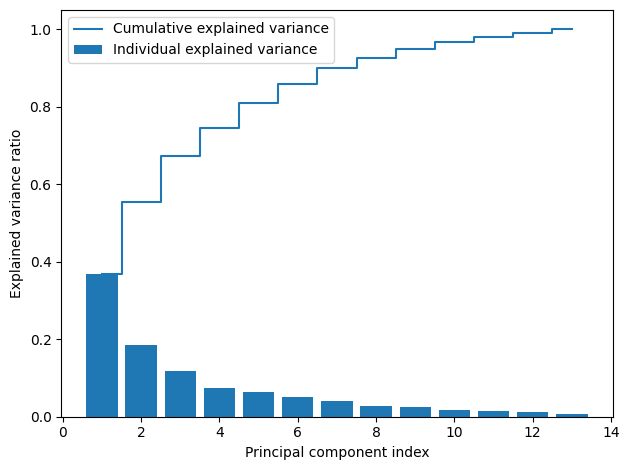

In [4]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, align='center', label='Individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid', label='Cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
# 첫 번째 주성분이 거의 분산의 40%를 커버
# 처음 2개의 주성분이 데이터셋에 있는 분산의 대략 60%를 설명명

#### 5.1.4 특성 변환

**5. 고윳값이 가장 큰 $k$개의 고유 벡터를 선택, 여기에서 k는 새로운 특성 부분 공간의 차원($k ≤ d$)**   
**6. 최상위 $k$개의 고유 벡터로 투영 행렬 $W$를 만듦**   
**7. 투영 행렬 $W$를 사용해서 $d$차원 입력 데이터셋 $X$를 새로운 $k$차원의 특성 부분 공간으로 변환**   

In [5]:
# (고윳값, 고유 벡터) 튜플의 리스트를 만듦
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# 높은 값에서 낮은 값으로 (고윳값, 고유 벡터) 튜플을 정렬
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [6]:
# 가장 큰 2개의 고윳값에 해당하는 고유 벡터 선택 -> 분산의 약 60%를 잡아냄
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))

print('투영 행렬 W : \n', w)

투영 행렬 W : 
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


투영 행렬을 사용하면 샘플 $x$(13차원의 행 벡터)를 PCA 부분 공간(2개의 주성분)에 투영하여 $x'$를 얻을 수 있음   
2개의 특성으로 구성된 2차원 샘플 벡터   
$\begin{align} \notag x' = xW \end{align}$

In [7]:
X_train_std[0].dot(w)

# 비슷하게 전체 124 * 13 차원의 훈련 데이터셋을 행렬 점곱으로 2개의 주성분에 투영 가능
X_train_pca = X_train_std.dot(w)

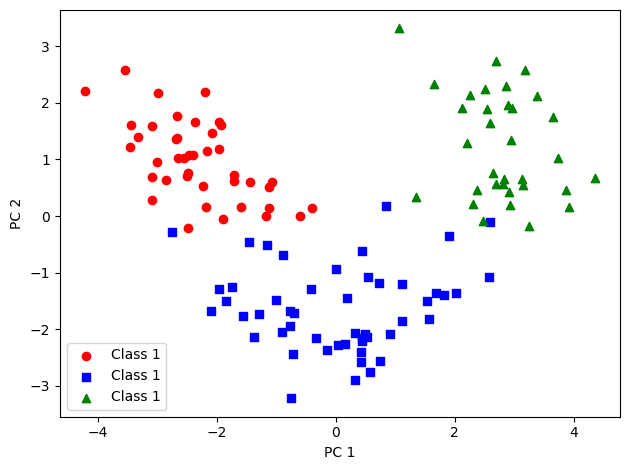

In [8]:
# 124 * 2 차원의 행렬로 변환된 Wine 훈련 데이터셋의 산점도
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l, 1],
                c=c, label=f'Class {1}', marker=m)
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### 5.1.5 사이킷런의 주성분 분석

d:\공부\MLDL\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


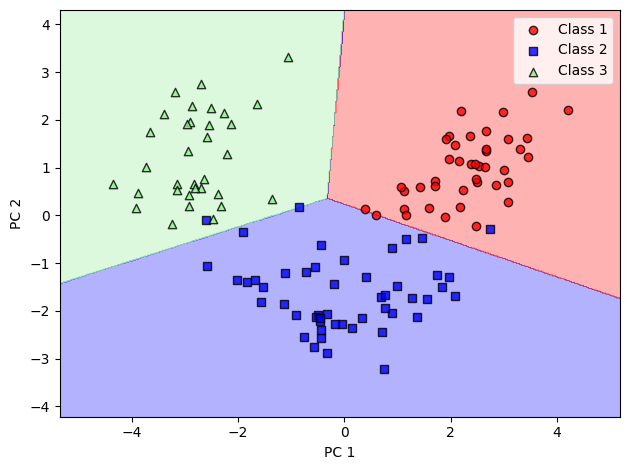

In [9]:
from plot_decision_regions import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import numpy as np

# PCA 변환기와 로지스틱 회귀 추정기를 초기화
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')

# 차원 축소
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# 축소된 데이터셋으로 로지스틱 회귀 모델 훈련
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [10]:
# 전체 주성분의 설명된 분산 비율을 알고 싶다면 n_components 매개변수를 None으로 지정하고 PCA 클래스의 객체를 만들면 됨, explained_variance_ratio_ 속성에서 모든 주성분의 설명된 분산 비율 확인 가능
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

**특성 기여도 평가하기**
로딩 : 원본 특성이 주성분에 얼마나 기여하는지 확인 => 고유 벡터에 고윳값의 제곱근을 곱해 계산 가능 => 이 결과 값을 원래 특성과 주성분 간의 상관관계로 해석 가능

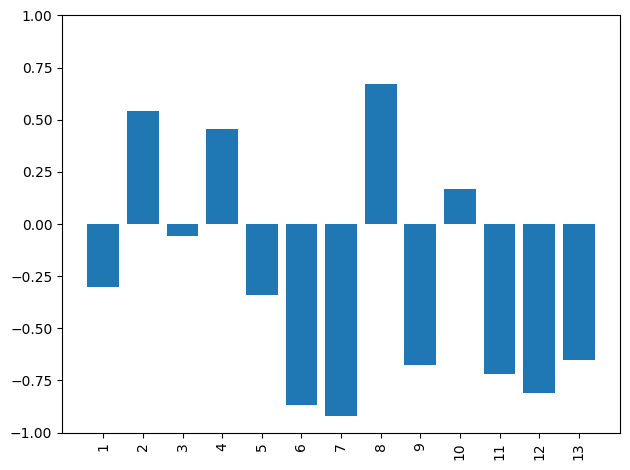

In [11]:
loadings = eigen_vecs * np.sqrt(eigen_vals)

fig, ax = plt.subplots()
ax.bar(range(13), loadings[:, 0], align='center')
ax.set_label('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

### 5.2 선형 판별 분석을 통한 지도 방식의 데이터 압축

#### 5.2.1 주성분 분석 vs 선형 판별 분석

**데이터 셋의 차원 개수를 줄이는 선형 변환 기법**
- PCA : 비지도 학습
- LDA : 지도 학습 알고리즘 → PCA보다 분류 작업에서 더 뛰어난 특성 추출 기법   
![](image/LDA.jpg)   
    - $x$축(LD 1)으로 투영하는 선형 판별 벡터는 2개의 정규 분포 클래스를 잘 구분
    - $y$축(LD 2)으로 투영하는 선형 판별 벡터는 데이터셋에 있는 분산을 많이 잡아내지만 클래스 판별 정보가 없기 때문에 좋은 선형 판별 벡터가 *아님*   
       
    **가정**   
    - 데이터가 정규 분포라고 가정
    - 클래스가 동일한 공분산 행렬을 가지고 훈련 샘플은 서로 통계적으로 독립적이라고 가정

#### 5.2.2 선형 판별 분석의 내부 동작 방식

1. $d$ 차원의 데이터셋을 표준화 전처리($d$ : 특성 개수)
2. 각 클래스에 대해 $d$ 차원의 평균 벡터를 계산
3. 클래스 간의 산포 행렬($scatter matrix$) $S_b$와 클래스 내 산포 행렬 $S_w$을 구성
4. **$S_W^{-1}S_B$** 행렬의 고유 벡터와 고윳값을 계산
5. 고윳값을 내림차순으로 정렬하여 고유 벡터의 순서를 매김
6. 고윳값이 가장 큰 $k$개의 고유 벡터를 선택해 $d * k$ 차원의 변환 행렬 $W$를 구성, 이 행렬의 열이 고유 벡터
7. 변환 행렬 $W$를 사용하여 샘플을 특성 부분 공간으로 투영   
   
---
행렬을 고윳값과 고유 벡터로 분해하여 새로운 저차원 특성 곤간을 구성한다는 점에서 PCA와 매우 닮음   
단계 2에서 계산하는 평균 벡터를 만드는 데 클래스 레이블 정보를 사용함

#### 5.2.3 산포 행렬 계산

평균 벡터 $m_i$는 클래스 $i$의 샘플에 대한 특성의 평균값 $μ_m$을 저장  
$\begin{align} \notag m_i = \frac{1}{n_i} \sum_{x∈D_i}{}x_m\end{align}$   
   
3개의 평균 벡터가 만들어짐   
$\begin{align} \notag m_i = \begin{bmatrix}
μ_{i,\;alcohol}   \\
μ_{i,\;malic\;acid}  \\
\vdots \\
μ_{i,\;proline} 
\end{bmatrix} i ∈ {{1,2,3}}\end{align}$   

In [12]:
# 3개의 레이블 각각에 대해 하나의 평균 벡터를 계산
np.set_printoptions(precision=4)
mean_vecs = []

for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' %(label, mean_vecs[label-1]))

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



**3. 클래스 간의 산포 행렬($scatter matrix$) $S_b$와 클래스 내 산포 행렬 $S_w$을 구성**   
$\begin{align} \notag S_W = \sum_{i=1}^cS_i \end{align} $   
$S_w$는 개별 클래스 $i$의 산포 행렬 $S_i$를 더해 구함
$\begin{align} \notag S_i = \sum_{x ∈ D_i} (x-m_i)^T(x-m_i) \end{align}$   

In [13]:
d = 13 # 특성 개수
S_W = np.zeros((d,d))
print(S_W)

for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in  X_train_std[y_train == label] : 
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter

print('클래스 내의 산포 행렬 : ', f'{S_W.shape[0]}x{S_W.shape[1]}')

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
클래스 내의 산포 행렬 :  13x13


산포 행렬을 계산할 때 훈련 데이터셋의 클래스 레이블이 균등하게 분포되어 있다고 가정   
but, 클래스 레이블의 개수를 출력해보면 이 가정이 틀림   
=> 개별 산포 행렬 $S_i$를 산포 행렬$S_w$로 모두 더하기 전에 스케일 조정함(즉 공분산 행렬은 산포 행렬의 정규화 버전)   
$\begin{align} \notag \sum_{i} = \frac{1}{n_i}S_i = \frac{1}{n_i} \sum_{x ∈ D_i}(x-m_i)^T(x-m_i)\end{align}$

In [14]:
print('클래스 레이블 분포 : ', np.bincount(y_train)[1:]) # 클래스 레이블 개수

클래스 레이블 분포 :  [41 50 33]


In [15]:
d = 13 # 특성 개수
S_W = np.zeros((d,d))

for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter

print('스케일 조정된 클래스 내의 산포 행렬 : ', f'{S_W.shape[0]}x{S_W.shape[1]}')

스케일 조정된 클래스 내의 산포 행렬 :  13x13


클래스 내 산포 행렬(또는 공분산 행렬)을 계산한 후 다음 단계로 넘어가 클래스 간의 산포 행렬 $S_B$를 계산   
$\begin{align} \notag S_B = \sum_{i=1}^c n_i(m_i - m)^T(m_i - m)\end{align}$

In [16]:
mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1)

d = 13 # 특성 개수
S_B = np.zeros((d,d))

for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d,1) # 열 벡터로 만들기
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('클래스 간의 산포 행렬 : ', f'{S_B.shape[0]}x{S_B.shape[1]}')

클래스 간의 산포 행렬 :  13x13


#### 5.2.4 새로운 특성 부분 공간을 위해 선형 판별 벡터 선택

남은 부분은 PCA와 유사   
공분산 행렬에 대한 고윳값 분해를 수행하는 대신 행렬 $S_W^{-1}S_B$의 고윳값을 계산하면 됨

In [17]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

# 고유 벡터와 고윳값 쌍을 계산한 후 내림차순으로 고윳값을 정렬
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

print('내림차순의 고윳값 : ')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

내림차순의 고윳값 : 
349.61780890599397
172.76152218979394
3.468545711267725e-14
2.842170943040401e-14
2.7442063449887868e-14
2.7442063449887868e-14
9.575021326720663e-15
9.575021326720663e-15
9.461437121374579e-15
8.932653014240921e-15
8.449943185761236e-15
2.9484922158293148e-15
1.2518544322246436e-15


LDA에서 선형 판별 벡터는 최대 c-1개(c : 클래스 레이블 개수) : 클래스 간의 산포행렬 $S_B$가 랭그 1 또는 그 이하인 c개의 행렬을 합한 것이기 때문

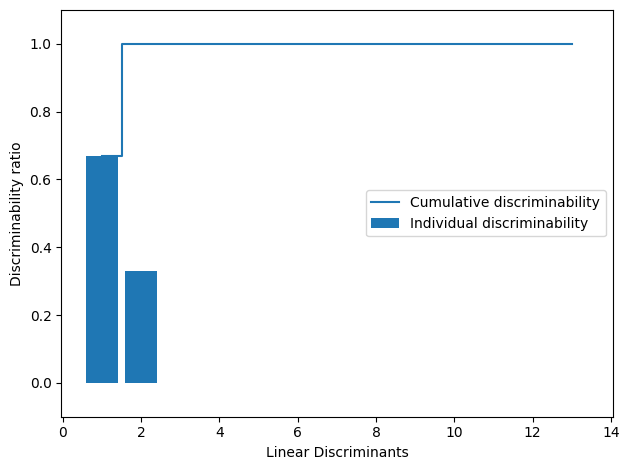

In [18]:
# 선형 판별 벡터로 잡은 클래스 판별 정보가 얼마나 많은지 측정하기 위해 고윳값의 내림차순으로 선형 판별 벡터를 그림
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]

cum_discr = np.cumsum(discr)

plt.bar(range(1,14), discr, align='center', label='Individual discriminability')
plt.step(range(1,14), cum_discr, where='mid', label='Cumulative discriminability')

plt.ylabel('Discriminability ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()
# 2개의 선형 판별 벡터가 Wine 데이터셋에 있는 정보 중 거의 100%를 잡아냄냄

2개의 선형 판별 고유 벡터를 열로 쌓아서 변환 행렬 $W$를 만듦

In [19]:
w= np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))

print("변환 행렬 W : \n", w)

변환 행렬 W : 
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


#### 5.2.5 새로운 특성 공간으로 샘플 투영

변환 행렬 $W$를 훈련 데이터셋에 곱해 데이터를 변환   
$\begin{align} \notag X' = XW \end{align}$

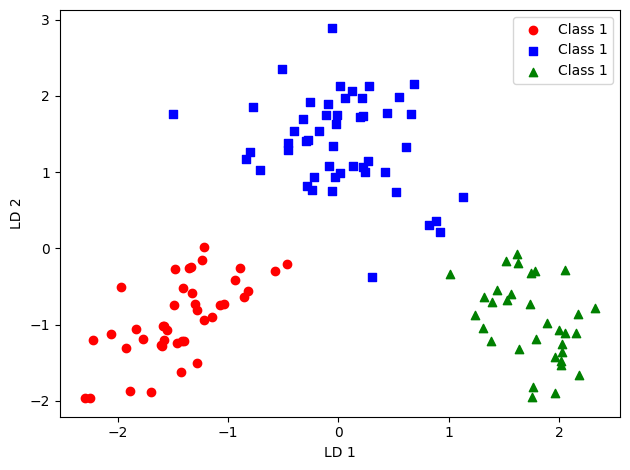

In [20]:
X_train_lda = X_train_std.dot(w)

colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0],
                X_train_lda[y_train==l, 1],
                c=c, label=f'Class {1}', marker=m)
    
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### 5.2.6 사이킷런의 LDA

d:\공부\MLDL\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


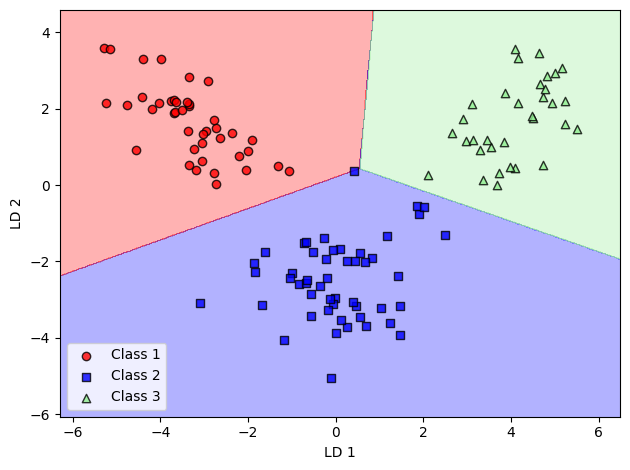

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')

lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

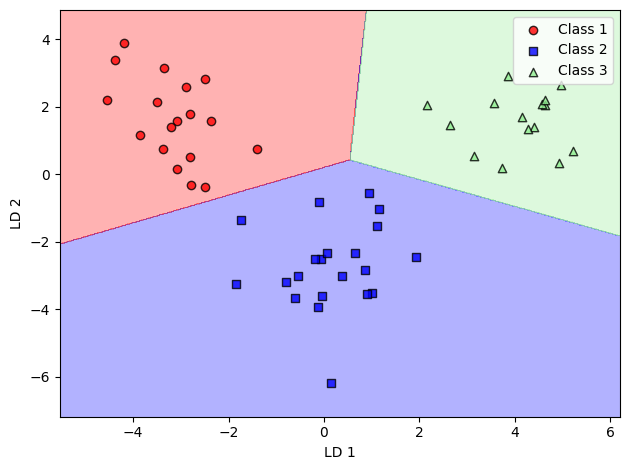

In [22]:
# 규제 강도를 낮추어 로지스틱 회귀 모델이 훈련 데이터셋의 모든 ㅐㅁ플을 더 확실하게 분류하도록 할 수 있음
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### 5.3 비선형 차원 축소와 시각화

#### 5.3.1 비선형 차원 축소를 고려하는 이유는 무엇인가요?

많은 머신 러닝 알고리즘은 입력 데이터가 선형적으로 구분 가능하다는 가정을 함 -> 비선형 문제에서는 PCA, LDA가 최선이 아님   
   
매니폴드 학습 : 비선형 차원 축소 기법의 개발과 적용, 고차원 공간에 포함된 저차원 공간   
-> 데이터 포인트 간의 관계를 보존하는 저차원 공간에 데이터를 투영하기 위해 데이터의 복잡한 구조를 파악(but, 어려움)   
![](image/비선형%20차원%20축소.jpg)

#### 5.3.2 t-SNE를 사용한 데이터 시각화

t-SNE : 복잡한 데이터셋을 2차원 또는 3차원으로 시각화   
1. 고차원(원본) 특성 공간에서 샘플 쌍의 거리를 기반으로 데이터 포인트를 모델링
2. 새로운 저차원 공간에서 원본 공간에 있는 쌍 거리의 확률 분포에 가까운 쌍 거리의 확률 분포를 찾음   
=> 원본 공간의 쌍 거리가 유지되도록 데이터 포인트를 저차원 공간에 임베딩하는 방법을 학습   
---
but, t-SNE는 시각화를 위한 기법 -> 투영을 위해 전체 데이터셋이 필요 => 새로운 데이터 포인트에 t-SNE 적용 불가

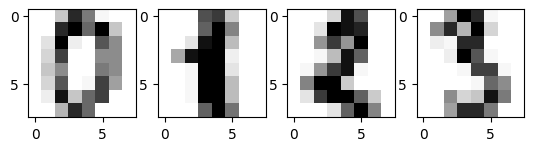

In [24]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, ax = plt.subplots(1,4)
for i in range(4):
    ax[i].imshow(digits.images[i], cmap='Greys')
plt.show()

In [25]:
digits.data.shape # 샘플이 행이고, 열이 픽셀에 해당하는 표 형식으로 데이터 제공

(1797, 64)

In [26]:
# 특성(픽셀)을 새 변수 X_digits에 할당, 레이블을 또 다른 새 변수 y_digits에 할당
y_digits = digits.target
X_digits = digits.data

In [27]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=123)

X_digits_tsne = tsne.fit_transform(X_digits) # 64차원 데이터셋을 2차원 공간에 투영, 논문에서 권장하는 대로 PCA를 사용하여 t-SNE 임베딩을 초기화)

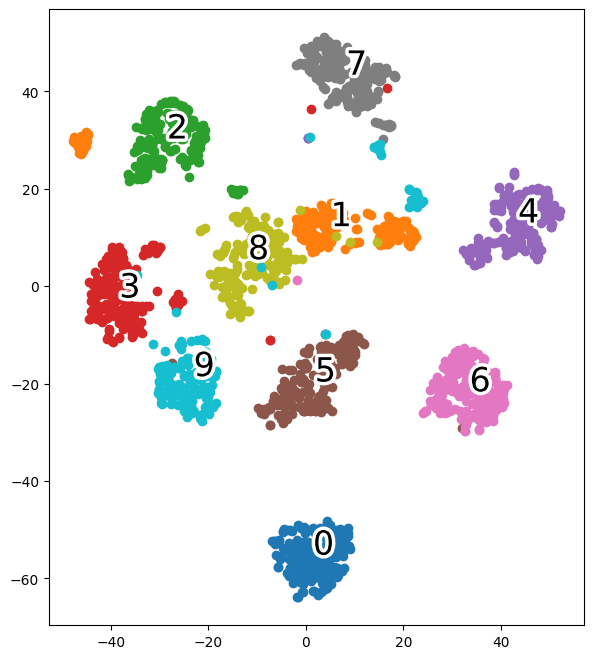

In [32]:
import matplotlib.patheffects as PathEffects

def plot_projection(x, colors):
    f = plt.figure(figsize=(8,8))
    ax = plt.subplot(aspect='equal')

    for i in range(10):
        plt.scatter(x[colors==i, 0],
                    x[colors==i, 1])
        
    for i in range(10) : 
        xtext, ytext = np.median(x[colors==i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground='w'),
            PathEffects.Normal()
        ])

plot_projection(X_digits_tsne, y_digits)
plt.show()